In [395]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d

In [396]:
def plot3d(x,y,z,U,s):
    c0=(s[0]*U[:,0]).flatten()
    c1=(s[1]*U[:,1]).flatten()
    c2=(s[2]*U[:,2]).flatten()
    vectors=np.array([[0,0,0,c0[0],c0[1],c0[2]],[0,0,0,c1[0],c1[1],c1[2]],[0,0,0,c2[0],c2[1],c2[2]]])
    fig = plt.figure(figsize=(16,9))
    ax = fig.gca(projection='3d')
    
    class Arrow3D(FancyArrowPatch):
    
        def __init__(self, xs, ys, zs, *args, **kwargs):
            FancyArrowPatch.__init__(self, (0, 0), (0, 0), *args, **kwargs)
            self._verts3d = xs, ys, zs

        def draw(self, renderer):
            xs3d, ys3d, zs3d = self._verts3d
            xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
            self.set_positions((xs[0], ys[0]), (xs[1], ys[1]))
            FancyArrowPatch.draw(self, renderer)
    v1=vectors[0]
    v2=vectors[1]
    v3=vectors[2]
#     print(v1)
#     print(v2)
#     print(v3)
    a = Arrow3D([0, v1[3]], [0, v1[4]], [0, v1[5]], mutation_scale=20,
            lw=1, arrowstyle="-|>", color="k")
    b = Arrow3D([0, v2[3]], [0, v2[4]], [0, v2[5]], mutation_scale=20,
            lw=1, arrowstyle="-|>", color="k")
    c = Arrow3D([0, v3[3]], [0, v3[4]], [0, v3[5]], mutation_scale=20,
            lw=1, arrowstyle="-|>", color="k")
    ax.add_artist(a)
    ax.add_artist(b)
    ax.add_artist(c)
    ax.plot3D(X, Y, Z, color='blue',alpha=0.5)

1

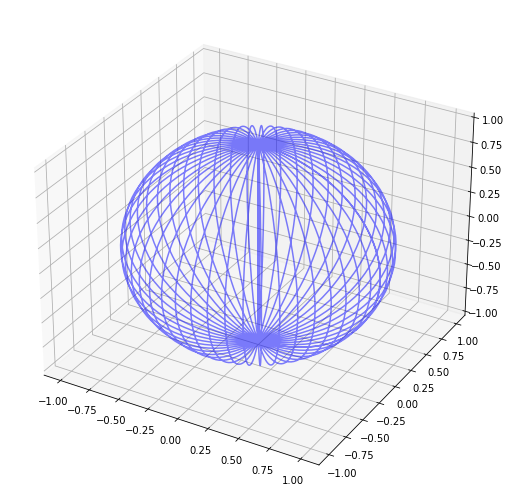

In [397]:
A1=np.random.rand(3,3)*100
A2=np.random.rand(3,3)*100
A3=np.random.rand(3,3)*100
u, v = np.mgrid[0:2*np.pi:50j, 0:np.pi:50j] 
x = np.cos(u)*np.sin(v)
y = np.sin(u)*np.sin(v)
z = np.cos(v)
S=np.array([x.flatten(),y.flatten(),z.flatten()])
fig = plt.figure(figsize=(16,9))
ax = fig.gca(projection='3d')
ax.plot3D(S[0], S[1], S[2], color='blue',alpha=0.5)

2,3

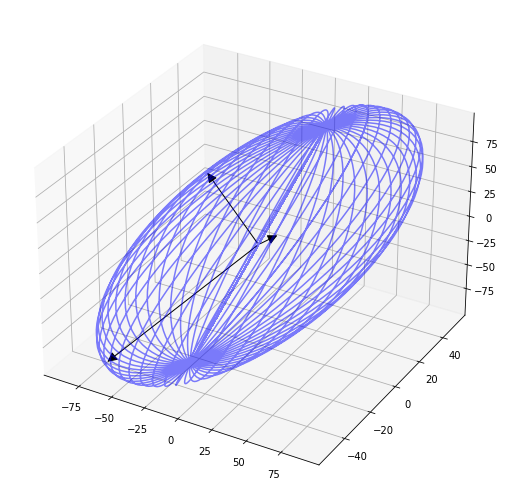

In [398]:
p1=A1@S
U,s,VT=np.linalg.svd(A1)
X=p1[0,0:]
Y=p1[1,0:]
Z=p1[2,0:]
plot3d(X,Y,Z,U,s)

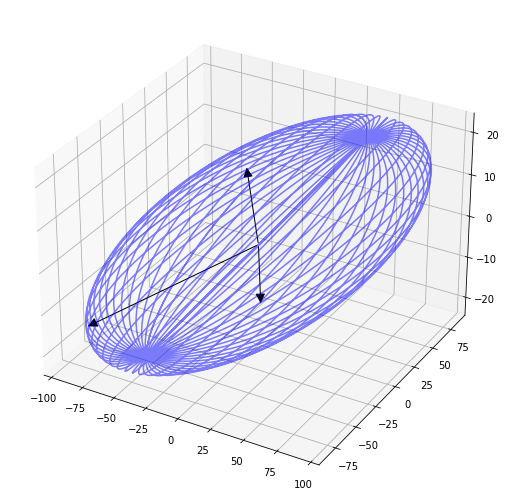

In [399]:
p1=A2@S
U,s,VT=np.linalg.svd(A2)
X=p1[0,0:]
Y=p1[1,0:]
Z=p1[2,0:]
plot3d(X,Y,Z,U,s)

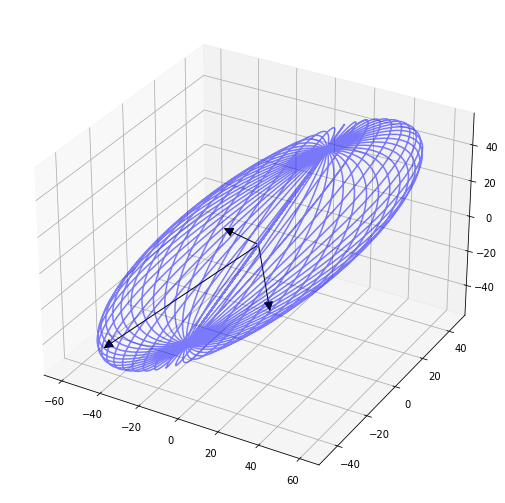

In [400]:
p1=A3@S
U,s,VT=np.linalg.svd(A3)
X=p1[0,0:]
Y=p1[1,0:]
Z=p1[2,0:]
plot3d(X,Y,Z,U,s)

4.

wartosci wlasne  [2.73635796e+04 9.58341401e+01 1.70624991e+00]
stosunek max/min 16037.263579668872


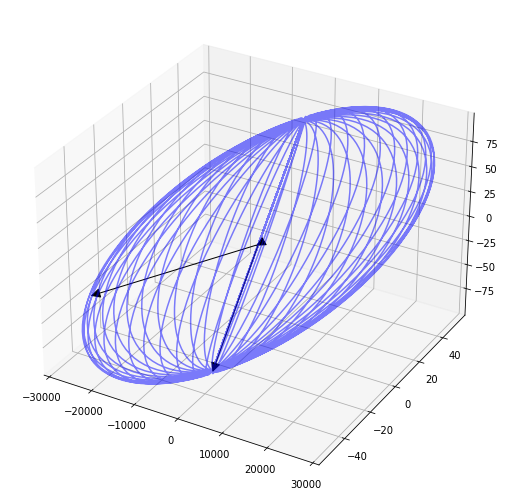

In [401]:
A1[0,0]*=1000
p1=A1@S
U,s,VT=np.linalg.svd(A1)
X=p1[0,0:]
Y=p1[1,0:]
Z=p1[2,0:]
plot3d(X,Y,Z,U,s)
print('wartosci wlasne ',s)
print('stosunek max/min',max(s)/min(s))

5

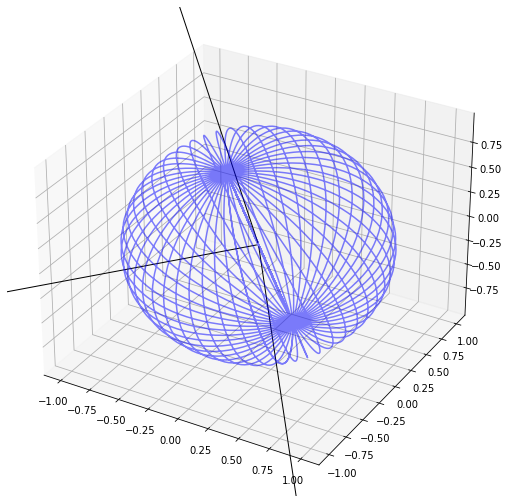

In [408]:
U,s,VT=np.linalg.svd(A2)
Sigma = np.zeros((3, 3))
p1=VT@S
for i in range(3):
    Sigma[i, i] = s[i]
X=p1[0,0:]
Y=p1[1,0:]
Z=p1[2,0:]
plot3d(X,Y,Z,U,s)

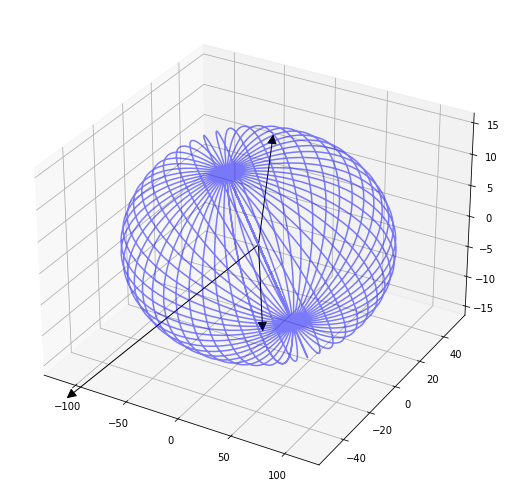

In [409]:
p1=Sigma@VT@S
X=p1[0,0:]
Y=p1[1,0:]
Z=p1[2,0:]
plot3d(X,Y,Z,U,s)

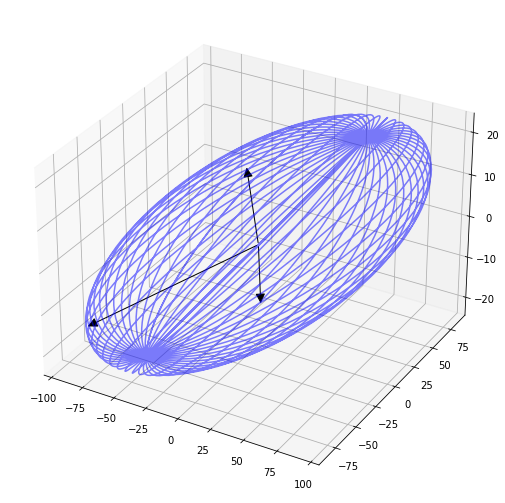

In [410]:
p1=U@Sigma@VT@S
X=p1[0,0:]
Y=p1[1,0:]
Z=p1[2,0:]
plot3d(X,Y,Z,U,s)

zadanie 2

oryginalny obrazek

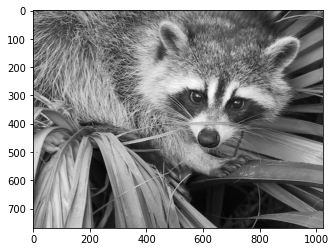

In [140]:
import scipy.misc as misc
img = misc.face(gray=True)
plt.imshow(img, cmap="gray")
plt.show()

In [141]:
U,s,Vt=np.linalg.svd(img)
Sigma = np.zeros((768, 1024))
for i in range(768):
    Sigma[i, i] = s[i]

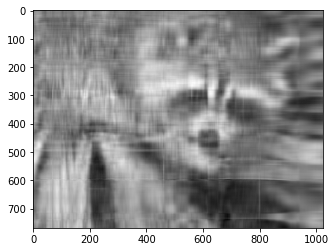

In [142]:
k=10
approx = U @ Sigma[:, :k] @ Vt[:k, :]
plt.imshow(approx, cmap="gray")


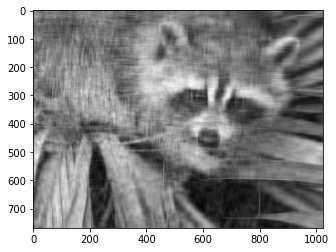

In [137]:
k=20
approx = U @ Sigma[:, :k] @ Vt[:k, :]
plt.imshow(approx, cmap="gray")


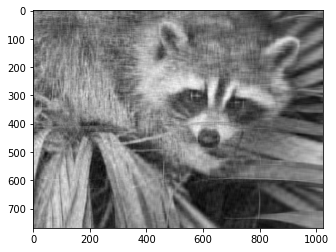

In [138]:
k=30
approx = U @ Sigma[:, :k] @ Vt[:k, :]
plt.imshow(approx, cmap="gray")


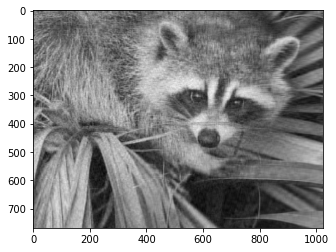

In [139]:
k=50
approx = U @ Sigma[:, :k] @ Vt[:k, :]
plt.imshow(approx, cmap="gray")


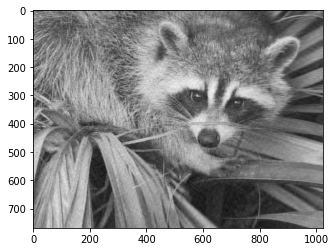

In [147]:
k=70
approx = U @ Sigma[:, :k] @ Vt[:k, :]
plt.imshow(approx, cmap="gray")

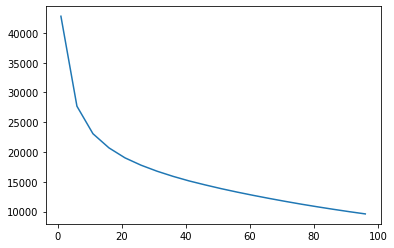

In [150]:
x=[]
y=[]
for k in range(1,100,5):
    x.append(k)
    y.append(np.linalg.norm(img-(U @ Sigma[:, :k] @ Vt[:k, :])))
plt.plot(x,y)